In [1]:
# -- Import Libraries --
# What it does: Imports all the necessary Python libraries for data manipulation,
# numerical operations, and visualization.
# Why it's here (The Rationale): Centralizing imports at the top is a standard best
# practice. It makes the notebook's dependencies clear from the beginning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# What it does: Configures pandas to display all columns of a DataFrame.
# Why it's here: Useful for not having columns hidden when you inspect DataFrames.
pd.set_option('display.max_columns', None)

# What it does: Sets a consistent, visually appealing style for all seaborn plots.
# Why it's here: Ensures your visualizations are clear and professional-looking.
sns.set_style('whitegrid')


print("Libraries imported successfully.")

Libraries imported successfully.


In [8]:
# -- Load the Dataset --
# --- Configuration ---
# What it does: Defines the path to the raw data file.
# Why it's here: Using a variable for the file path makes the code cleaner and easier
# to modify if the filename or location changes.
RAW_DATA_FILENAME = "full_fraud_data.csv" # Or "sampled_fraud_data_500000.csv" for dev
RAW_DATA_PATH = os.path.join(".", "data", "raw_data", RAW_DATA_FILENAME) # Use ".." to go up one level from `notebooks/`

# --- Data Loading with Error Handling ---
try:
    # What it does: Reads the CSV file into a pandas DataFrame.
    # Why it's here: This is the primary data loading step. The try/except block ensures
    # the notebook stops with a clear error if the data file is missing.
    print(f"Attempting to load data from: {RAW_DATA_PATH}")
    df = pd.read_csv(RAW_DATA_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Data file not found at '{RAW_DATA_PATH}'.")
    print("Please ensure you have run the data acquisition script from P2L0 Step 0.2.")
    # Stop execution if data is not found by raising the error.
    raise

Attempting to load data from: .\data\raw_data\full_fraud_data.csv
Dataset loaded successfully.


In [9]:
# -- Display Shape and First Few Rows --

# What it does: Prints the dimensions of the DataFrame (rows, columns) and shows the first 5 rows.
# Why it's here: This is the most basic check to confirm the data loaded correctly and to get a
# feel for the columns and their values.
print(f"DataFrame shape: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head())

DataFrame shape: 6362620 rows, 11 columns


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# -- Check Data Types and Null Values --

# What it does: Provides a concise summary of the DataFrame, including the data type of each
# column and the number of non-null values.
# Why it's here: This is a critical data quality check. It helps identify:
# 1. Missing data (null values).
# 2. Columns that were read with the wrong data type (e.g., a number column read as 'object'/'string').
# 3. Memory usage of the DataFrame.
print("DataFrame Info:")
df.info()

print("\n" + "="*50 + "\n")

# What it does: Calculates and displays the total number of missing values for each column.
# Why it's here: Provides a direct count of nulls, making it easy to spot problematic columns.
print("Missing Values per Column:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Missing Values per Column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
# -- Summarize Numerical Columns --

# What it does: Generates descriptive statistics (count, mean, std, min, max, quartiles) for all
# numerical columns in the DataFrame.
# Why it's here: This gives you a powerful statistical overview to identify potential outliers,
# understand the scale and range of features, and spot potential data skewness.
# Implementation Detail: `.T` transposes the output, making it much easier to read when there
# are many columns.
print("Descriptive Statistics for Numerical Features:")
display(df.describe().T)

Descriptive Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


Target Variable Distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage of Fraudulent Transactions: 0.1291%


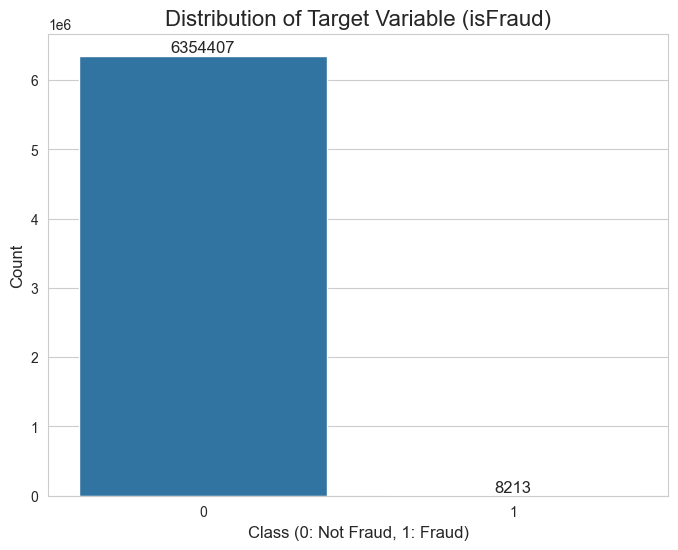

In [12]:
# -- Analyze the 'isFraud' Column --

# What it does: Calculates the frequency of each class in the target variable ('isFraud').
# Why it's here (The Rationale): For any classification problem, understanding the class
# distribution is the most important step. It tells you if you have a balanced or imbalanced dataset.
print("Target Variable Distribution:")
target_counts = df['isFraud'].value_counts()
print(target_counts)

print(f"\nPercentage of Fraudulent Transactions: {target_counts[1] / len(df) * 100:.4f}%")

# What it does: Creates a bar plot to visually represent the class distribution.
# Why it's here: A visualization makes the imbalance immediately obvious.
plt.figure(figsize=(8, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Target Variable (isFraud)', fontsize=16)
plt.xlabel('Class (0: Not Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
# What it does: Adds text labels on top of the bars for clarity.
for index, value in enumerate(target_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontdict={'size':12})
plt.show()

Distribution of Transaction Types:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


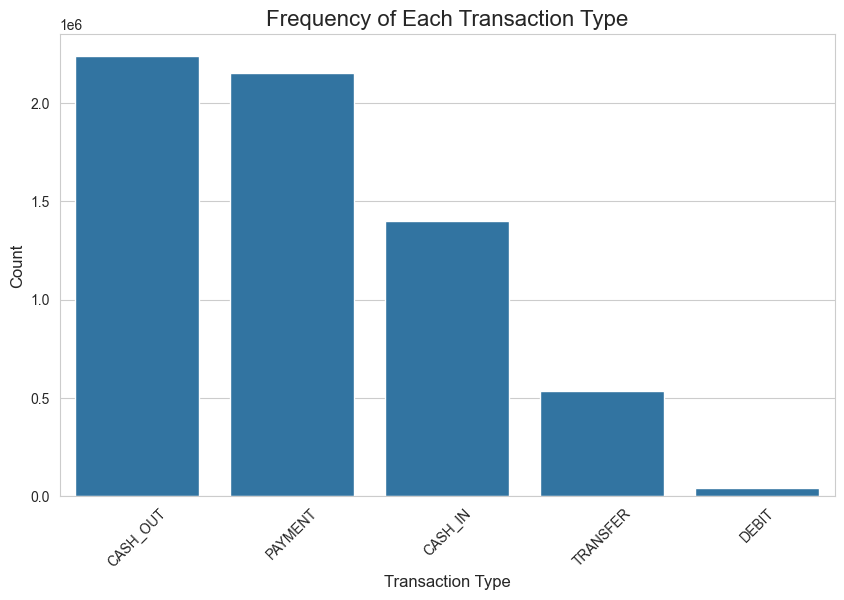



Fraud Counts per Transaction Type:
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


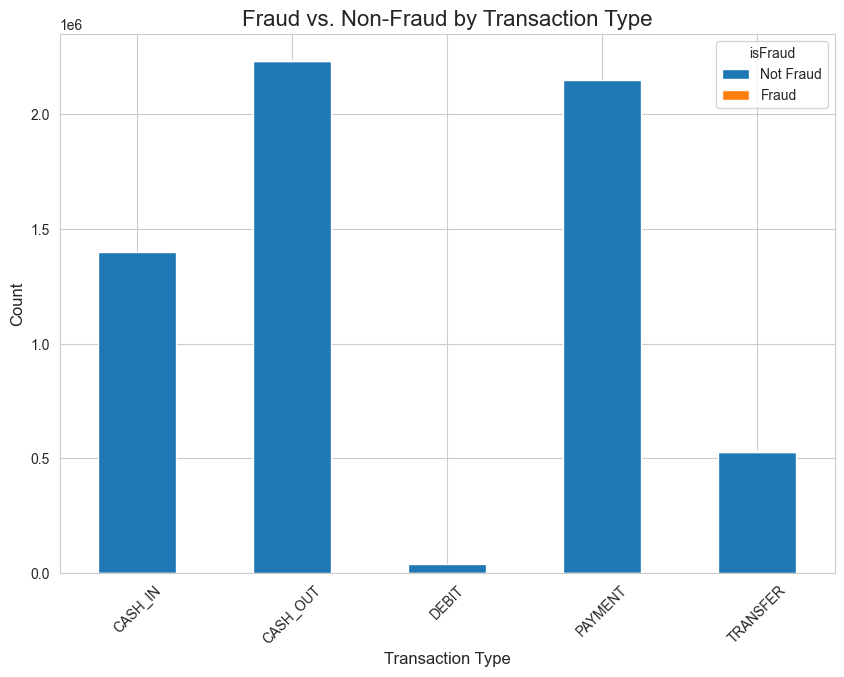

In [13]:
# -- Analyze Categorical Feature (type) --

# What it does: Analyzes the distribution of the categorical 'type' feature and its relationship with fraud.
# Why it's here: To understand which transaction types are most common and which are most associated with fraud.
# This directly informs feature engineering (e.g., one-hot encoding).

print("Distribution of Transaction Types:")
print(df['type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.title('Frequency of Each Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\n" + "="*50 + "\n")

print("Fraud Counts per Transaction Type:")
# What it does: Creates a cross-tabulation to see the count of fraud vs. non-fraud for each type.
fraud_by_type = pd.crosstab(df['type'], df['isFraud'])
print(fraud_by_type)

# What it does: Visualizes the cross-tabulation.
fraud_by_type.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Fraud vs. Non-Fraud by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='isFraud', labels=['Not Fraud', 'Fraud'])
plt.show()

Histograms of Numerical Features:


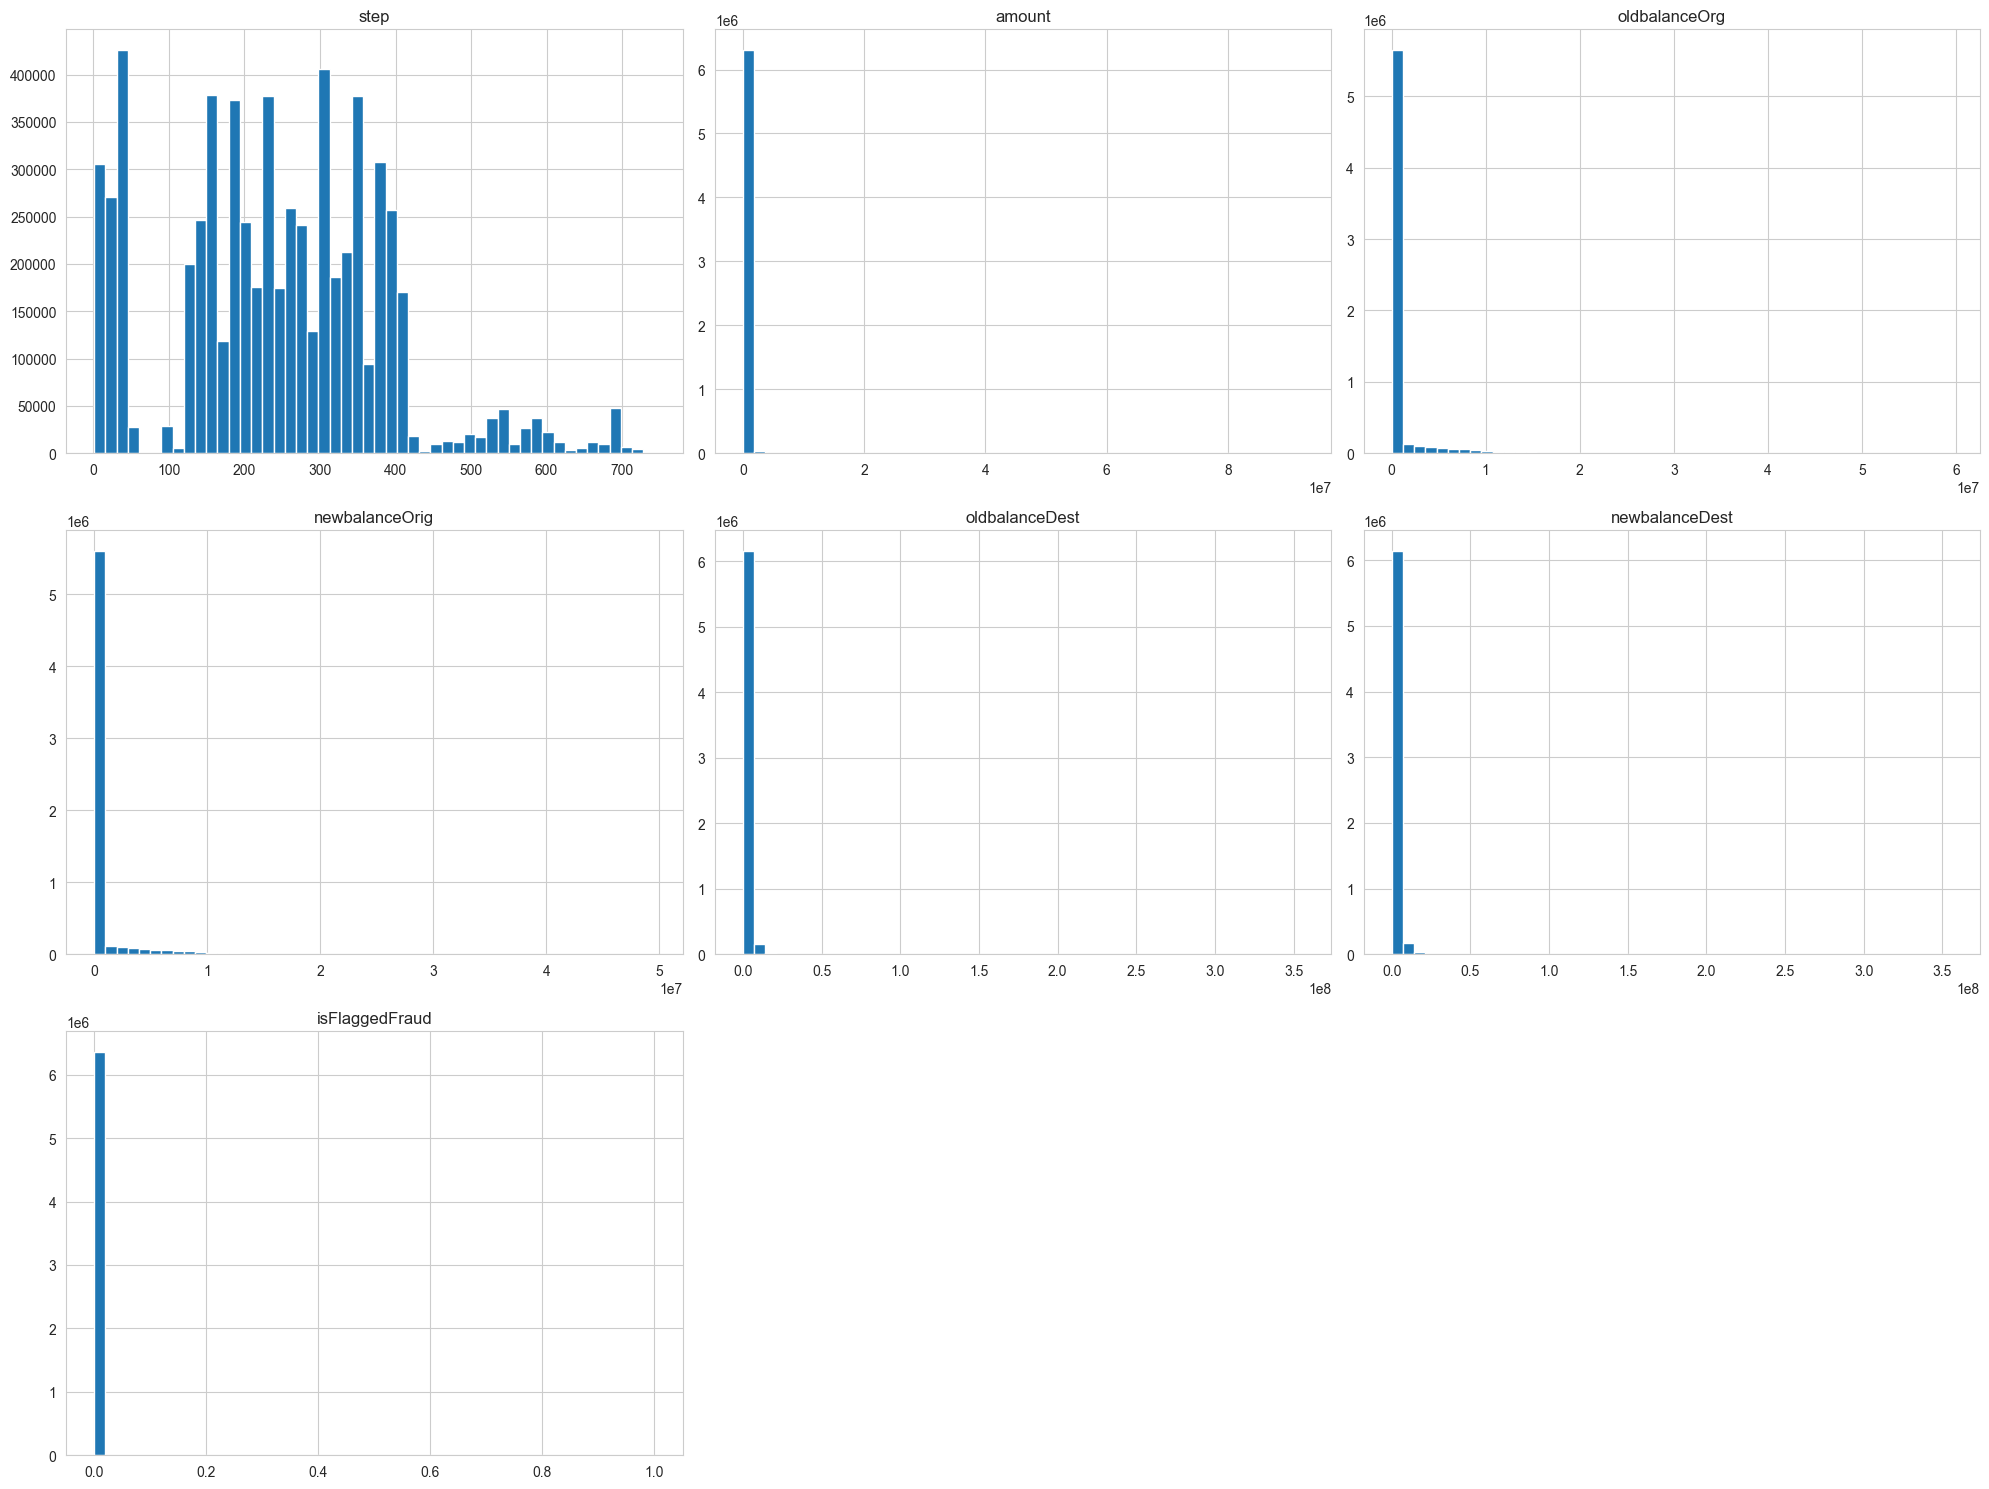

In [14]:
# -- Analyze Numerical Features' Distributions --

# What it does: Generates histograms for all numerical features to visualize their distributions.
# Why it's here: Helps identify skewness. Many ML models perform better on normally distributed data.
# Highly skewed data might benefit from transformations (e.g., log transformation).

# Select only numerical columns for this plot, excluding the binary target.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('isFraud') # Don't plot the target here

print("Histograms of Numerical Features:")
df[numerical_cols].hist(bins=50, figsize=(20, 15))
plt.tight_layout() # Adjusts plot params for a tight layout.
plt.show()

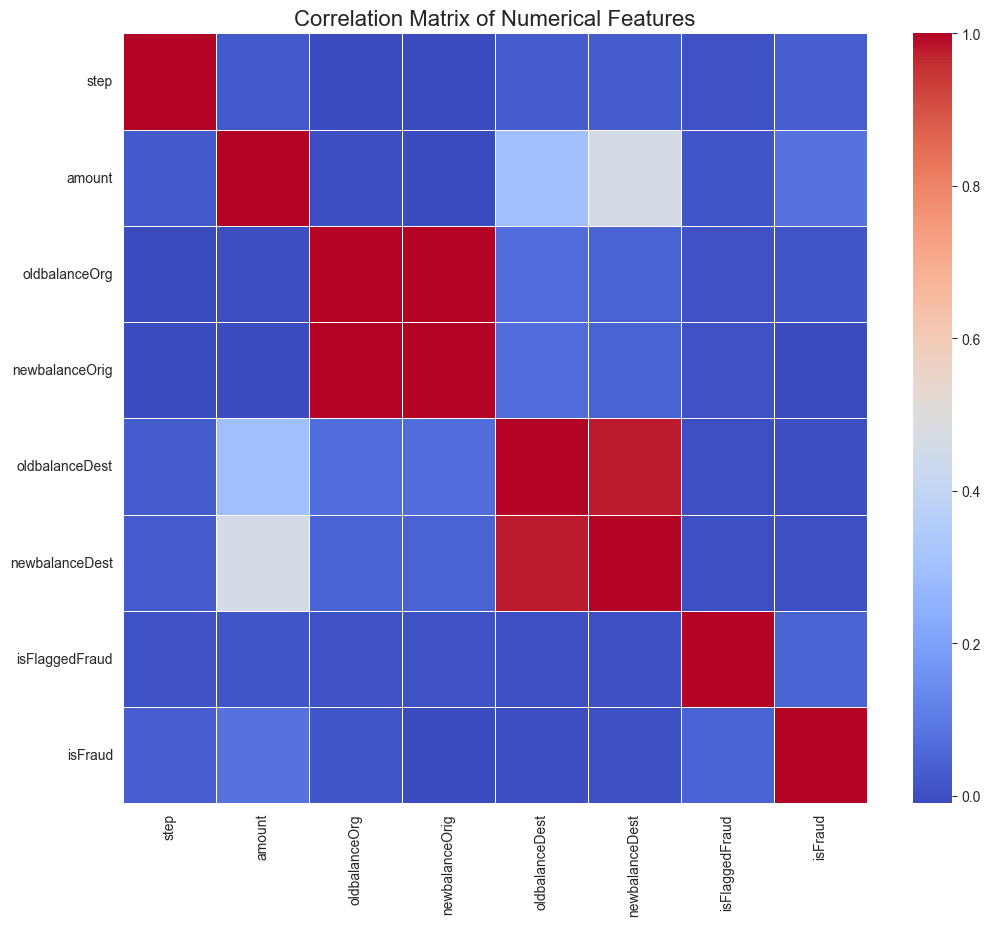


Top correlations with 'isFraud':
isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [15]:
# -- Explore Correlation Between Features --

# What it does: Calculates the pairwise correlation of columns and visualizes it as a heatmap.
# Why it's here: Helps identify multicollinearity (features that are highly correlated with each other),
# which can sometimes be an issue for certain models. It also shows which features are most correlated
# with the target variable, `isFraud`.

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols + ['isFraud']].corr() # Include target in correlation
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

print("\nTop correlations with 'isFraud':")
print(correlation_matrix['isFraud'].sort_values(ascending=False))

### EDA Summary & Key Insights

This Exploratory Data Analysis of the 6.36 million transaction records has revealed several critical insights that will directly shape our MLOps pipeline strategy.

**1. Data Quality is Excellent:**
*   The dataset is complete with **zero missing values** across all 11 columns, which significantly simplifies the cleaning phase.
*   Data types were inferred correctly by `pandas`, with financial figures as floats/integers and categorical data as objects.

**2. Severe Class Imbalance is the Core Challenge:**
*   The dataset is highly imbalanced, with fraudulent transactions (`isFraud` = 1) accounting for only **8,213 out of 6,362,620 records (approximately 0.13%)**.
*   **Strategic Implication:** Standard accuracy will be a misleading evaluation metric. Our primary focus for model evaluation must be on metrics sensitive to the minority class, such as **F1-score, Precision-Recall curves (AUC-PR), and Recall**. Stratified sampling must be used during train-test splits to ensure the test set contains a representative proportion of fraudulent cases.

**3. Fraud is Exclusive to Specific Transaction Types:**
*   A crucial discovery is that fraudulent activities are **exclusively limited to `TRANSFER` and `CASH_OUT` transaction types**.
*   No instances of fraud were found for `PAYMENT`, `CASH_IN`, or `DEBIT` types.
*   **Strategic Implication:** This provides a powerful business rule. In a real-world system, we could potentially filter out non-`TRANSFER`/`CASH_OUT` transactions from the prediction pipeline to improve efficiency. For modeling, this means the one-hot encoded features for `type_TRANSFER` and `type_CASH_OUT` will be highly significant predictors.

**4. Numerical Features are Highly Skewed:**
*   The histograms for `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest` all show extreme right-skewness.
*   **Strategic Implication:** To help linear-based models and even tree-based models perform better and converge faster, applying a **logarithmic transformation (e.g., `np.log1p`)** to these skewed features during preprocessing will be a mandatory step.

**5. Redundant and Low-Impact Features:**
*   The `nameOrig` and `nameDest` columns are customer IDs with very high cardinality and are unlikely to provide generalizable patterns. They should be dropped.
*   The `isFlaggedFraud` feature is a business rule flag that was triggered for only 16 transactions in the entire dataset. While it has a positive correlation with `isFraud`, its rarity makes it a weak standalone predictor, but it should still be included in the model.

### Next Steps: Strategy for P2L1 Spark Preprocessing

Based on this EDA, our `preprocess_with_spark.py` script will be designed to perform the following key actions:

1.  **Drop Unnecessary Columns:** Remove `nameOrig` and `nameDest`.
2.  **Handle Skewness:** Apply a log transformation (`log1p`) to `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, and `newbalanceDest`.
3.  **Feature Engineering:**
    *   Create new features that capture the transactional logic, such as `errorBalanceOrig` (`newbalanceOrig` + `amount` - `oldbalanceOrg`) and `errorBalanceDest` (`oldbalanceDest` + `amount` - `newbalanceDest`).
    *   One-hot encode the `type` column, creating new binary features like `type_CASH_OUT`, `type_PAYMENT`, etc.
4.  **Output Cleaned Data:** Save the final, engineered feature set as a Parquet file, which will be the input for our model training stage.